<a href="https://colab.research.google.com/github/models-in-wildlife-ecology/albertotest/blob/main/The(generalized)LinearModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the (G)LM**

This notebook introduces the fundamental componenents of linear models. It provides an understanding of what makes a model linear, the linear predictor, stochasticit elements (error), and an illustration of the different applications of linear models.


## What is a linear model?
A linear model is a model described by the equation of a line.  

$$y = mx+b$$

![pciture](https://drive.google.com/uc?export=view&id=1dgF-P1epQEwmGe6YmGOqJPOuxJtQ7oq0)



# Typically in linear regression, we rearrange it:

### $$y =\alpha+\beta x,$$

### where:  
* ### $y$ is the dependent variable (or 'response' variable);
* ### $x$ is the independent variable (or 'response' variable);
* ### $\alpha$ is the intercept (i.e., the value of $y$ when $x=0$); and
* ### $\beta$ is the slope of the line, also called the *coefficient*.

## $\beta$, in theory, describes the 'relationship' between $y$ and $x$

# For example:

### Imagine we have a heron rookery that is rapidly declining in size. If we measure the population over a 16 year period, and the population goes from 40 individuals in year 0 to 16 individuals in year 16, we might want to know the rate of decline  

![pciture](https://drive.google.com/uc?export=view&id=1djDh_DswE5gx1GIOn333gwdzelgPLy4A)


First, we will illustrate a straight-line linear model.

 [1] 40.0 38.5 37.0 35.5 34.0 32.5 31.0 29.5 28.0 26.5 25.0 23.5 22.0 20.5 19.0
[16] 17.5 16.0


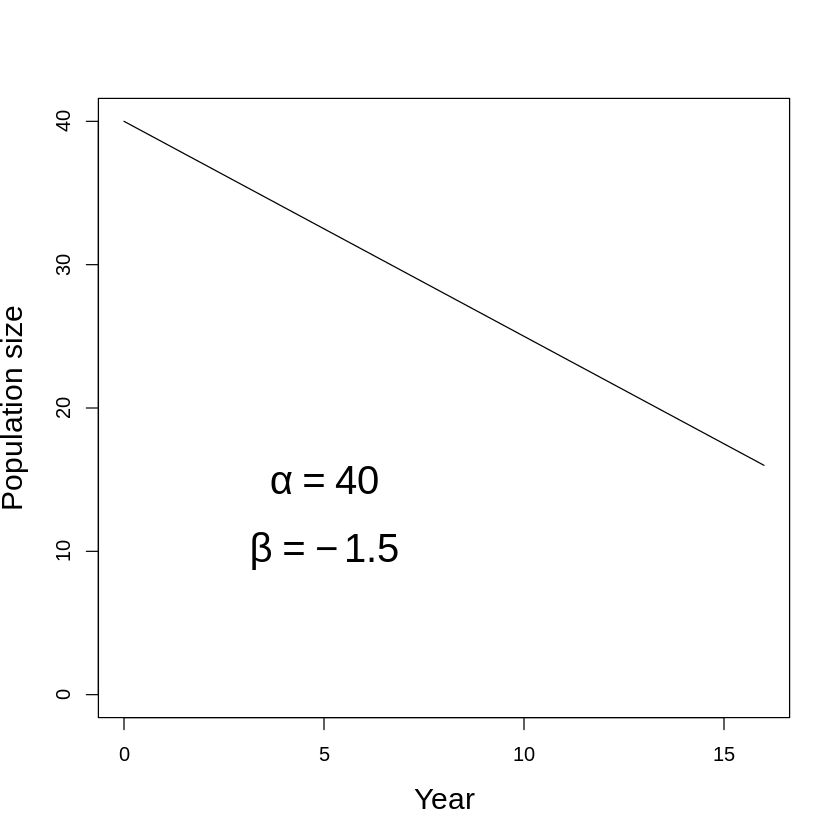


A linear model does not have to describe a straight line. It can describe a *curved* line as well:
$$y=\alpha + \beta_1 x + \beta_2 x^2$$



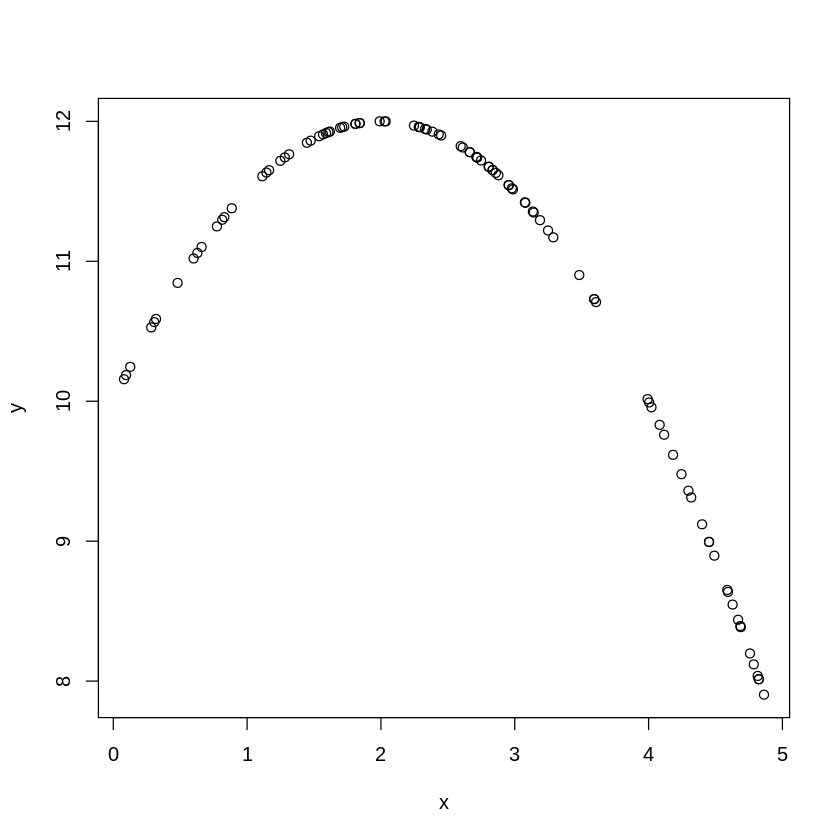

In [ ]:
x <- sort(runif(100, 0, 5))

alpha <- 10
beta1 <- 2
beta2 <- -0.5

y <- alpha + beta1*x + beta2*(x^2)
plot(x, y)

Despite the curvature, this is *still* a linear model!

## Stochastic Part
### Nature is *unpredictable* (i.e. ***stochastic***)

### There is always an element of *chance* in any outcome

* ### There is actually a reason: (we just don't know it!)

* #### Data is a combination of *modeled* (deterministic) and *unmodeled* (stochastic) factors

* #### These are ***random variables***

### Often stochsticity can be described by a ***probability distribution***


## The Normal (Gaussian) Distribution
### Distributions are described by parameters, e.g., if:

### $$y \sim Normal(\mu, \sigma^2)$$

### Parameters  are $\mathbf{\mu}$ and $\mathbf{\sigma}$  

### In normal linear regression, we are trying to estimate $\mu$ and $\sigma$


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  486.9   579.7   599.8   599.9   620.0   721.8 

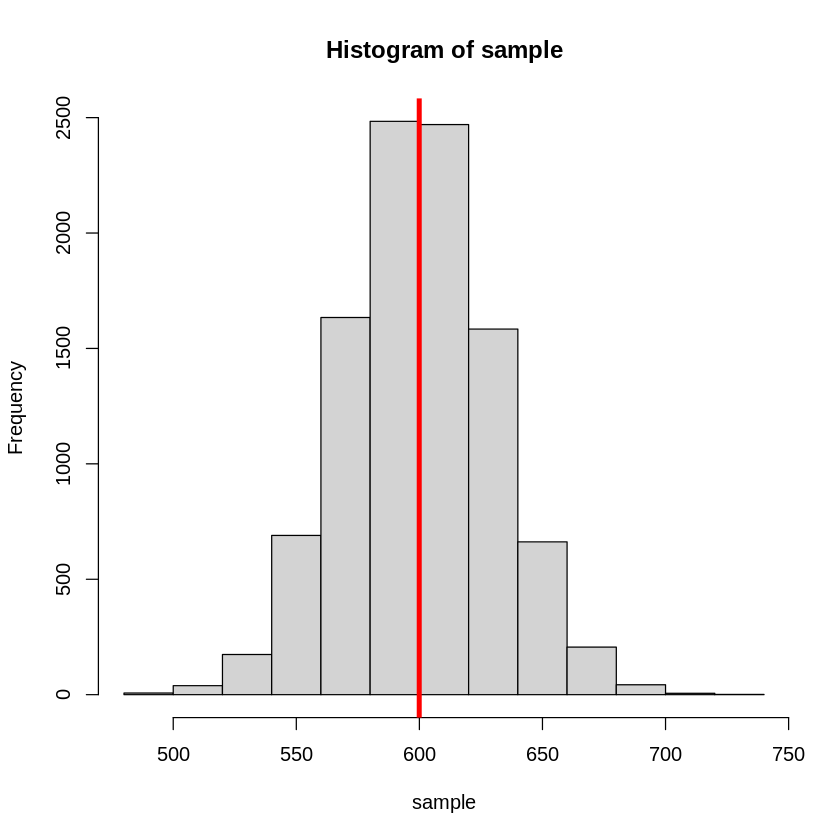

In [ ]:
# Example of a Normal Distribution
## Mass of fish in Lake Superior

n <- 10000
mu <- 600
sigma <- 30

sample <- rnorm(n = n, mean = mu, sd = sigma)
summary(sample)

hist(sample)
abline(v = mean(sample), col = "red", lwd = 4)


## Understanding the linear predictor
### The linear predictor is the determinstic part of the model
### The Design Matrix represents your *parameterization* of the model
Parameterization = the way you describe the system or process

### >    y ~ A + B
#### This is a common command to type into R using the lm() or glm() function, where A and B are the predictor variables on y

### What does R do internally when you type this in?



# > model.matrix()
```{r, echo = FALSE}

```

In [ ]:
y = rnorm(6, 2, 0.5)
dt <- data.frame(y = y, A = as.factor(rep(c(1, 2), each = 3)), B = y/2.5)
print(model.matrix(y ~ A + B, data = dt))

  (Intercept) A2         B
1           1  0 0.6489317
2           1  0 1.1360654
3           1  0 0.7232692
4           1  1 0.8151701
5           1  1 0.8323487
6           1  1 0.8405333
attr(,"assign")
[1] 0 1 2
attr(,"contrasts")
attr(,"contrasts")$A
[1] "contr.treatment"



## Illstrating the Design Matrix
### Imagine measuring weight (mass) and snout-vent length (svl) in a population of lizards from 3 different populations in 2 different regions and among 3 different habitat types
#### Taken from [Kéry 2010](https://www.sciencedirect.com/book/9780123786050/introduction-to-winbugs-for-ecologists)

In [ ]:
mass <- c(6, 8,5,7,9,11)
pop <- factor(c(1,1,2,2,3,3))
region <- factor(c(1,1,1,1,2,2))
hab <- factor(c(1,2,3,1,2,3))
svl <- c(40, 45,39,50,52,57)

df <- data.frame(mass = mass, pop = pop, region = region, hab = hab, svl = svl)

print(df)


  mass pop region hab svl
1    6   1      1   1  40
2    8   1      1   2  45
3    5   2      1   3  39
4    7   2      1   1  50
5    9   3      2   2  52
6   11   3      2   3  57


## It's all part of the same family...
### i.e., a normal linear model

* ### Estimate of the mean and standard deveiation
* ### Simple 2-sample t-test
* ### Normal linear regression
* ### ANOVA


## The model of the mean
### For R code: > lm(mass ~ 1)

### $mass_i=\mu + \epsilon_i$

#### or

### > model.matrix(mass ~ 1)


In [ ]:
model.matrix(mass ~ 1)


,(Intercept)
1,1
2,1
3,1
4,1
5,1
6,1


In [ ]:
summary(lm(mass ~ 1))


Call:
lm(formula = mass ~ 1)

Residuals:
      1       2       3       4       5       6 
-1.6667  0.3333 -2.6667 -0.6667  1.3333  3.3333 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.6667     0.8819   8.693 0.000333 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.16 on 5 degrees of freedom


## The 2-sample t-test

### For R code: > lm(mass ~ region)

### $mass_i=\alpha + \beta*region_i + \epsilon_i$

### where $\epsilon_i \sim Normal(0, \sigma^2)$

### > model.matrix(mass ~ region)

In [ ]:
model.matrix(mass ~ region)

,(Intercept),region2
1,1,0
2,1,0
3,1,0
4,1,0
5,1,1
6,1,1


[1]  6  8  5  7  9 11

## The 2-sample t-test

### Alternative description

### $mass_i \sim Normal(\alpha + \beta*region_i, \sigma^2)$

In [ ]:
summary(lm(mass ~ region))


Call:
lm(formula = mass ~ region)

Residuals:
   1    2    3    4    5    6 
-0.5  1.5 -1.5  0.5 -1.0  1.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.5000     0.6614   9.827 0.000601 ***
region2       3.5000     1.1456   3.055 0.037841 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.323 on 4 degrees of freedom
Multiple R-squared:    0.7,	Adjusted R-squared:  0.625 
F-statistic: 9.333 on 1 and 4 DF,  p-value: 0.03784


## 2 things to be aware of in the above model summary:
1. The intercept represents $\alpha$, and is also the mean of mass in region 1
2. region2 is the beta coefficient, and doesn NOT represent the mean of mass for region 2. Instead, it is ***the change in the mean of mass between region 2 and region 1***

## **Interpretation:** the estimated mean mass of lizards in region 1 is 6.5, and the estimated mean mass of lizards in region 2 is 9.

### **Note:** we say estimated mean mass because they are being estimated, by the model, from samples of the population in each reagion.

## **Extras:**
1. How do we interpret the standard error?
2. Why is the standard error for region 2 so much larger?
3. How do we interpret the p-value?


## Calculating the **expected values**   
### Matrix Multiplication!

$$\begin{pmatrix}
E[mass_1] \\
E[mass_2] \\
E[mass_2] \\
E[mass_2] \\
E[mass_2] \\
E[mass_2] \\
\end{pmatrix} =
\begin{pmatrix}
1 & 0 \\
1 & 0 \\
1 & 0 \\
1 & 0 \\
1 & 1 \\
1 & 1 \\
\end{pmatrix} *
\begin{pmatrix}
\alpha & \beta
\end{pmatrix}  +
\begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\epsilon_3 \\
\epsilon_4 \\
\epsilon_5 \\
\epsilon_6 \\
\end{pmatrix}
$$

This is the inner product of the design matrix and the parameter vector, plus the *error*

## We can also ***reparameterize*** the model and obtain a *different* interpretation of the coefficients

### If we write: model.matrix (mass ~ region - 1), we get


In [ ]:
model.matrix(mass ~ region - 1)

,region1,region2
1,1,0
2,1,0
3,1,0
4,1,0
5,0,1
6,0,1


### And the matrix equation changes to:

$$\begin{pmatrix}
E[mass_1] \\
E[mass_2] \\
E[mass_2] \\
E[mass_2] \\
E[mass_2] \\
E[mass_2] \\
\end{pmatrix} =
\begin{pmatrix}
1 & 0 \\
1 & 0 \\
1 & 0 \\
1 & 0 \\
0 & 1 \\
0 & 1 \\
\end{pmatrix} *
\begin{pmatrix}
\alpha & \beta
\end{pmatrix}  +
\begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\epsilon_3 \\
\epsilon_4 \\
\epsilon_5 \\
\epsilon_6 \\
\end{pmatrix}
$$

### **Questions:** How is the interpretation of $\beta$ now different?

## Simple Linear Regression
### Where the random variable $x_i$ is continuous:

### $mass_i=\alpha + \beta*svl_i + \epsilon_i$

### where $\epsilon_i \sim Normal(0, \sigma^2)$
#### or
### $mass_i \sim Normal(\alpha + \beta*svl_i, \sigma^2)$

In [ ]:
model.matrix(mass ~ svl)

,(Intercept),svl
1,1,40
2,1,45
3,1,39
4,1,50
5,1,52
6,1,57


In [ ]:
summary(lm(mass ~ svl))


Call:
lm(formula = mass ~ svl)

Residuals:
       1        2        3        4        5        6 
 0.34286  0.94086 -0.37674 -1.46113 -0.02193  0.57608 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -5.5588     2.8565  -1.946  0.12352   
svl           0.2804     0.0600   4.673  0.00949 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9503 on 4 degrees of freedom
Multiple R-squared:  0.8452,	Adjusted R-squared:  0.8065 
F-statistic: 21.84 on 1 and 4 DF,  p-value: 0.009495


## The linear predictor

$$\begin{pmatrix}
E[mass_1] \\
E[mass_2] \\
E[mass_2] \\
E[mass_2] \\
E[mass_2] \\
E[mass_2] \\
\end{pmatrix} =
\begin{pmatrix}
1 & 40 \\
1 & 45 \\
1 & 39 \\
1 & 50 \\
1 & 52 \\
1 & 57 \\
\end{pmatrix} *
\begin{pmatrix}
\alpha & \beta
\end{pmatrix}  +
\begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\epsilon_3 \\
\epsilon_4 \\
\epsilon_5 \\
\epsilon_6 \\
\end{pmatrix}
$$

***Qestions:*** How dow we interpret the intercept?

## One-way Analysis of variance (ANOVA)
### Where the random variable is a factor with 3 levels:

### $mass_i=\alpha + \beta_{j(i)}*pop_i + \epsilon_i$

### where $\epsilon_i \sim Normal(0, \sigma^2)$
### The $j$ next to the $\beta$ indexes the 2 different $\beta$'s: One for pop2 and one for pop3. We can see this in the design matrix for the *effects* parameterization:

In [ ]:
model.matrix(mass ~ pop)

,(Intercept),pop2,pop3
1,1,0,0
2,1,0,0
3,1,1,0
4,1,1,0
5,1,0,1
6,1,0,1


### The alternative way to write it would be:

## $$mass_i = \alpha + \beta_1*pop2_i + \beta_2*pop3_i$$

### Again, we interpret the $\beta$'s as the $effect$ of pop2 (or pop3) on the reference population.

## But, we can also change the interpretation using the *means* parameterization:


In [ ]:
model.matrix(mass ~ pop - 1)

,pop1,pop2,pop3
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
5,0,0,1
6,0,0,1


### **Questions:** In the *means* parameterization, how would we write the model?





## Let's look at the difference when the model is fit:

In [ ]:
# The effects parameterization
summary(lm(mass ~ pop))


Call:
lm(formula = mass ~ pop)

Residuals:
 1  2  3  4  5  6 
-1  1 -1  1 -1  1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    7.000      1.000   7.000  0.00599 **
pop2          -1.000      1.414  -0.707  0.53048   
pop3           3.000      1.414   2.121  0.12403   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.414 on 3 degrees of freedom
Multiple R-squared:  0.7429,	Adjusted R-squared:  0.5714 
F-statistic: 4.333 on 2 and 3 DF,  p-value: 0.1304


In [ ]:
# The means parameterization
summary(lm(mass ~ pop - 1))


Call:
lm(formula = mass ~ pop - 1)

Residuals:
 1  2  3  4  5  6 
-1  1 -1  1 -1  1 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)   
pop1        7          1       7  0.00599 **
pop2        6          1       6  0.00927 **
pop3       10          1      10  0.00213 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.414 on 3 degrees of freedom
Multiple R-squared:  0.984,	Adjusted R-squared:  0.9681 
F-statistic: 61.67 on 3 and 3 DF,  p-value: 0.003406
